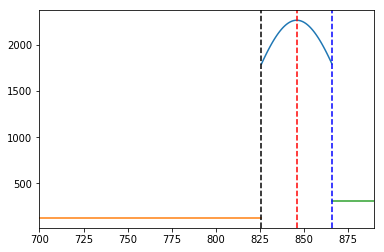

In [52]:
import numpy
from matplotlib import pyplot
%matplotlib inline
T_m = 846
dT = 20
T_l = T_m + dT

T_s = T_m - dT 

Lf = 151.53 * ( 10 ** 3 ) # J/kg

def Cp ( T ) :
    '''
    T : Temperature in degrees Celsius
    Specific heat capacity for Bi2Te3 below 500 C calculated in cal/deg*C
    and converted and returned in J/kgK
    Ref: Bolling, G. F. "Erratum: Addendum to Some Thermal Data for Bi2Te3." 
    The Journal of Chemical Physics 36.4 (1962): 1085-1086.
    '''
    Cp = ( 3 * ( 10 ** - 2 ) ) + ( 2 * ( 10 ** -5 ) ) * T # Result in cal/deg*g
    Cp = Cp * 4186.8 #Convert to J/kgK
    return Cp

C_s = Cp ( 27 )


def C_apparent ( C_solid, latent_heat, T_solidus, T_liquidus, T_melting, Temperature ):
    num = numpy.exp(-(((Temperature-T_melting)** 2)/((T_liquidus - T_solidus)**2)))
    den =numpy.sqrt ( numpy.pi* ((T_liquidus - T_solidus)**2) )
    Apparent_capacity=C_solid+ (latent_heat*(num/den))
    return Apparent_capacity 

T_ini = numpy.linspace(300,T_s,100)
T_tra = numpy.linspace(T_s,T_l,100)

pyplot.figure()

pyplot.plot (T_tra,C_apparent (C_s,Lf,T_s,T_l,T_m,T_tra))
CSarray = numpy.zeros((100,1))
CSarray[:] = C_s
pyplot.plot(T_ini,CSarray)

CLarray = numpy.zeros((100,1))
CLarray[:] = (C_s + (Lf/T_m))
T_after = numpy.linspace(T_l,1000,100)
pyplot.plot(T_after, CLarray)

pyplot.plot()
pyplot.xlim(700,890)
pyplot.axvline(x=T_s,color='black', linestyle='--');
pyplot.axvline(x=T_l,color='blue', linestyle='--');
pyplot.axvline(x=T_m,color='red', linestyle='--');

In [42]:
numpy.shape(CSarray)

(100, 1)

In [43]:
numpy.shape(T_ini)


(100,)

In [19]:
C_apparent (C_s,Lf,T_s,T_l,T_m,1000)

127.86565278909225

In [54]:
(numpy.sqrt(numpy.pi*400))

35.44907701811032

In [ ]:
( 3 * ( 10 ** - 2 ) ) + ( 2 * ( 10 ** -5 ) ) * T # Result in cal/deg*g
    Cp = Cp * 4186.8 #Convert to J/kgK

In [55]:
(3 * ( 10 ** - 2 ))*4186.8

125.604

In [56]:
( 2 * ( 10 ** -5 ) )*4186.8

0.083736

In [60]:
(0.08368*895) + 125.52 + (Lf/895)

369.72086256983243